# CT4101 Assignment 1: Random Forest Analysis

This notebook demonstrates Random Forest analysis on the wildfire prediction dataset with hyperparameter tuning using only 2 parameters.

## Dataset Information
- **Training set**: `wildfires_training.csv`
- **Test set**: `wildfires_test.csv`
- **Target variable**: `fire` (yes/no)
- **Features**: Multiple environmental variables

## Key Features of Random Forest
- **Ensemble method**: Combines multiple decision trees
- **Feature importance**: Provides interpretable feature rankings
- **Robust to overfitting**: Built-in regularization through tree diversity
- **No feature scaling required**: Works well with raw features

## Assignment Requirements
- **Hyperparameter tuning**: Using only 2 parameters (max_depth, min_samples_leaf)
- **Performance comparison**: Default settings vs best tuned model


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import helper functions from the main script
from ct4101_assignment import (
    load_and_prepare_data,
    train_baseline_random_forest,
    hyperparameter_tuning_random_forest,
    get_best_random_forest_model,
    evaluate_random_forest_model,
    get_feature_importance,
    RANDOM_STATE
)


In [2]:
# Load and prepare the dataset using helper function
train_df, test_df, y_train, y_test, X_train, X_test = load_and_prepare_data()

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nTraining set columns:", train_df.columns.tolist())
print("\nFirst few rows of training set:")
train_df.head()


Training set shape: (154, 10)
Test set shape: (50, 10)

Training set columns: ['fire', 'year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']

First few rows of training set:


,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18


In [3]:
# Train baseline Random Forest model using helper function
rf_baseline, baseline_train_acc, baseline_test_acc, baseline_overfitting_gap = train_baseline_random_forest(X_train, y_train, X_test, y_test)

print("=== Baseline Random Forest Results ===")
print(f"Training accuracy: {baseline_train_acc:.4f}")
print(f"Test accuracy: {baseline_test_acc:.4f}")
print(f"Overfitting gap: {baseline_overfitting_gap:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, rf_baseline.predict(X_test)))
print(f"\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, rf_baseline.predict(X_test)))


=== Baseline Random Forest Results ===
Training accuracy: 1.0000
Test accuracy: 0.8400
Overfitting gap: 0.1600

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.92      0.79      0.85        28

    accuracy                           0.84        50
   macro avg       0.84      0.85      0.84        50
weighted avg       0.85      0.84      0.84        50


Confusion Matrix (Test Set):
[[20  2]
 [ 6 22]]


=== All Hyperparameter Tuning Results ===
    max_depth  min_samples_leaf  train_acc  test_acc  overfitting_gap
0           3                 1   0.941558      0.84         0.101558
1           3                 2   0.941558      0.84         0.101558
2           3                 3   0.941558      0.84         0.101558
3           3                 4   0.941558      0.84         0.101558
4           3                 5   0.935065      0.84         0.095065
5           4                 1   0.967532      0.86         0.107532
6           4                 2   0.961039      0.86         0.101039
7           4                 3   0.948052      0.84         0.108052
8           4                 4   0.948052      0.86         0.088052
9           4                 5   0.948052      0.86         0.088052
10          5                 1   0.987013      0.84         0.147013
11          5                 2   0.974026      0.84         0.134026
12          5                 3   0.967532      

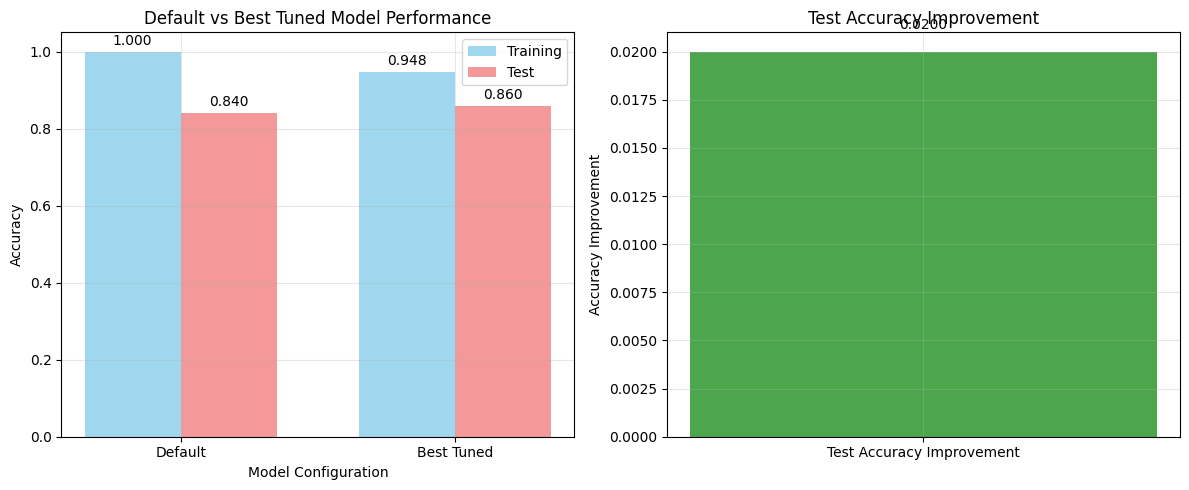

In [4]:
# Perform hyperparameter tuning using helper function (2 parameters only)
rf_results = hyperparameter_tuning_random_forest(X_train, y_train, X_test, y_test)

print("=== All Hyperparameter Tuning Results ===")
print(rf_results.sort_values(['max_depth', 'min_samples_leaf']).reset_index(drop=True))

# Get best model using helper function
best_rf_model, best_rf_params = get_best_random_forest_model(rf_results, X_train, y_train)

print(f"\n=== Best Model Configuration ===")
print(f"max_depth: {best_rf_params['max_depth']}")
print(f"min_samples_leaf: {best_rf_params['min_samples_leaf']}")
print(f"Training accuracy: {best_rf_params['train_acc']:.4f}")
print(f"Test accuracy: {best_rf_params['test_acc']:.4f}")

# Create comparison table
comparison_data = {
    'Model': ['Default Settings', 'Best Tuned Model'],
    'max_depth': [8, best_rf_params['max_depth']],
    'min_samples_leaf': [1, best_rf_params['min_samples_leaf']],
    'Train Accuracy': [baseline_train_acc, best_rf_params['train_acc']],
    'Test Accuracy': [baseline_test_acc, best_rf_params['test_acc']],
    'Improvement': ['-', f"{best_rf_params['test_acc'] - baseline_test_acc:.4f}"]
}

comparison_df = pd.DataFrame(comparison_data)
print(f"\n=== Default vs Best Tuned Model Comparison ===")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart comparison
models = ['Default', 'Best Tuned']
train_accs = [baseline_train_acc, best_rf_params['train_acc']]
test_accs = [baseline_test_acc, best_rf_params['test_acc']]

x = np.arange(len(models))
width = 0.35

ax1.bar(x - width/2, train_accs, width, label='Training', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, test_accs, width, label='Test', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Model Configuration')
ax1.set_ylabel('Accuracy')
ax1.set_title('Default vs Best Tuned Model Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (train, test) in enumerate(zip(train_accs, test_accs)):
    ax1.text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', va='bottom')
    ax1.text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', va='bottom')

# Line plot showing improvement
improvement = best_rf_params['test_acc'] - baseline_test_acc
ax2.bar(['Test Accuracy Improvement'], [improvement], color='green', alpha=0.7)
ax2.set_ylabel('Accuracy Improvement')
ax2.set_title('Test Accuracy Improvement')
ax2.grid(True, alpha=0.3)

# Add value label
ax2.text(0, improvement + 0.001, f'{improvement:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


=== Best Model Detailed Performance ===
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.92      0.82      0.87        28

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50


Confusion Matrix (Test Set):
[[20  2]
 [ 5 23]]

Feature Importance (Top 5):
         feature  importance
4   drought_code    0.300196
5  buildup_index    0.264087
3       rainfall    0.218699
1           temp    0.084488
2       humidity    0.081507


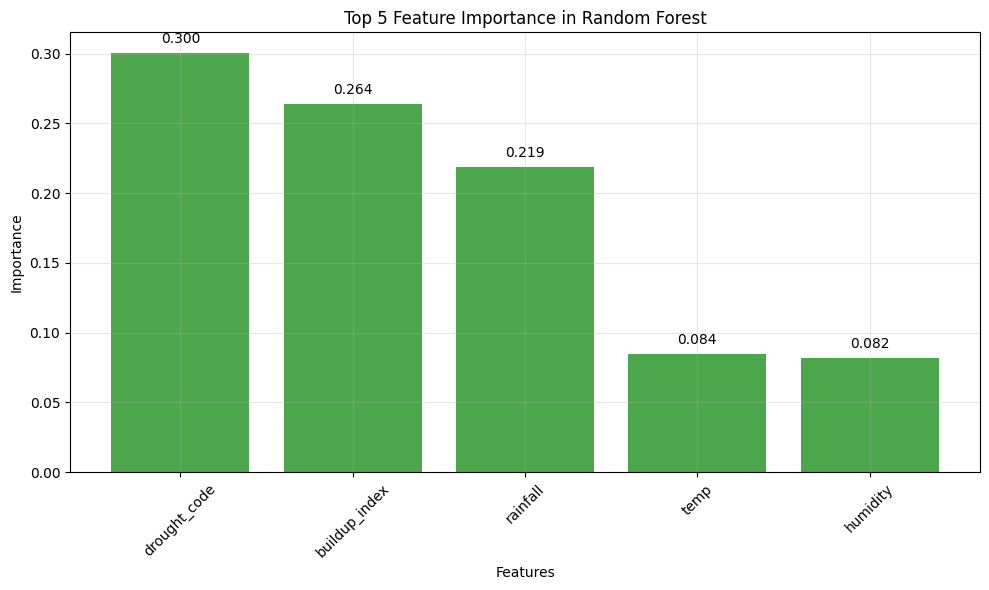

In [5]:
# Evaluate best model using helper function
best_rf_pred, best_rf_report, best_rf_cm = evaluate_random_forest_model(best_rf_model, X_test, y_test)

print("=== Best Model Detailed Performance ===")
print("Classification Report (Test Set):")
print(best_rf_report)
print("\nConfusion Matrix (Test Set):")
print(best_rf_cm)

# Get feature importance using helper function
feature_importance = get_feature_importance(best_rf_model, X_train.columns.tolist())
print("\nFeature Importance (Top 5):")
print(feature_importance.head())

# Visualize top 5 feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(5)
bars = plt.bar(top_features['feature'], top_features['importance'], alpha=0.7, color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importance in Random Forest')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, importance in zip(bars, top_features['importance']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, 
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Results saved to 'rf_results.csv'


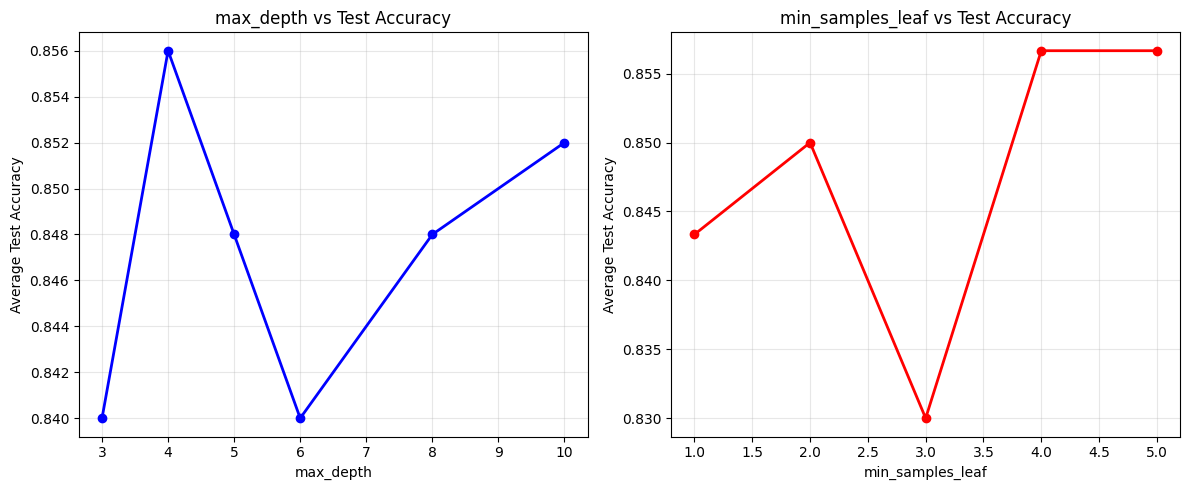

Hyperparameter analysis plot saved as 'rf_hyperparameter_analysis.png'


In [6]:
# Save results to CSV
rf_results.to_csv('rf_results.csv', index=False)
print("Results saved to 'rf_results.csv'")

# Create hyperparameter tuning visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. max_depth vs Test Accuracy
depth_results = rf_results.groupby('max_depth')['test_acc'].mean()
ax1.plot(depth_results.index, depth_results.values, 'bo-', linewidth=2, markersize=6)
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Average Test Accuracy')
ax1.set_title('max_depth vs Test Accuracy')
ax1.grid(True, alpha=0.3)

# 2. min_samples_leaf vs Test Accuracy
leaf_results = rf_results.groupby('min_samples_leaf')['test_acc'].mean()
ax2.plot(leaf_results.index, leaf_results.values, 'ro-', linewidth=2, markersize=6)
ax2.set_xlabel('min_samples_leaf')
ax2.set_ylabel('Average Test Accuracy')
ax2.set_title('min_samples_leaf vs Test Accuracy')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rf_hyperparameter_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Hyperparameter analysis plot saved as 'rf_hyperparameter_analysis.png'")
